In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/clean_data.csv")
df.head()

,company_name,issue_amount_(rs.cr.),assets_(rs.cr.),revenue_(rs.cr.),profit_after_tax_(rs.cr.),net_worth_(rs.cr.),reserves_and_surplus_(rs.cr.),total_borrowing_(rs.cr.),issue_price_(rs),listing_day_close_price,sub,gmp,anchor
0,Game Changers Texfab,52.08,52.25,24.11,4.27,25.27,12.76,9.88,102,109.35,1.17,1.0,1.0
1,Jayesh Logistics,27.17,65.22,25.25,2.02,19.35,13.01,29.65,122,117.80,65.59,92.0,1.0
2,Sihora Industries,10.03,15.90,5.86,0.45,5.71,1.98,5.71,66,66.50,1.27,1.0,0.0
3,Mittal Sections,50.26,50.48,28.17,1.47,11.81,3.94,20.70,143,108.70,2.25,1.0,0.0
4,Greenleaf Envirotech,20.75,25.38,39.08,4.70,12.41,7.79,2.49,136,132.90,3.84,1.0,0.0


In [7]:
df.shape

(514, 13)

In [8]:
df.isnull().sum()

company_name                       0
issue_amount_(rs.cr.)              0
assets_(rs.cr.)                    0
revenue_(rs.cr.)                   1
profit_after_tax_(rs.cr.)          1
net_worth_(rs.cr.)                 5
reserves_and_surplus_(rs.cr.)    197
total_borrowing_(rs.cr.)         209
issue_price_(rs)                   0
listing_day_close_price            0
sub                               70
gmp                               70
anchor                            70
dtype: int64

In [9]:
list(df.columns)

['company_name',
 'issue_amount_(rs.cr.)',
 'assets_(rs.cr.)',
 'revenue_(rs.cr.)',
 'profit_after_tax_(rs.cr.)',
 'net_worth_(rs.cr.)',
 'reserves_and_surplus_(rs.cr.)',
 'total_borrowing_(rs.cr.)',
 'issue_price_(rs)',
 'listing_day_close_price',
 'sub',
 'gmp',
 'anchor']

In [10]:
company_name = df["company_name"]
df = df.drop("company_name", axis=1)

In [94]:
# df = df[['issue_amount_(rs.cr.)',
#  'profit_after_tax_(rs.cr.)',
#  'net_worth_(rs.cr.)',
#  'issue_price_(rs)',
#  'listing_day_close_price',
#  'sub',
#  'gmp',
#  'anchor']]

In [11]:
df.fillna(0, inplace=True)

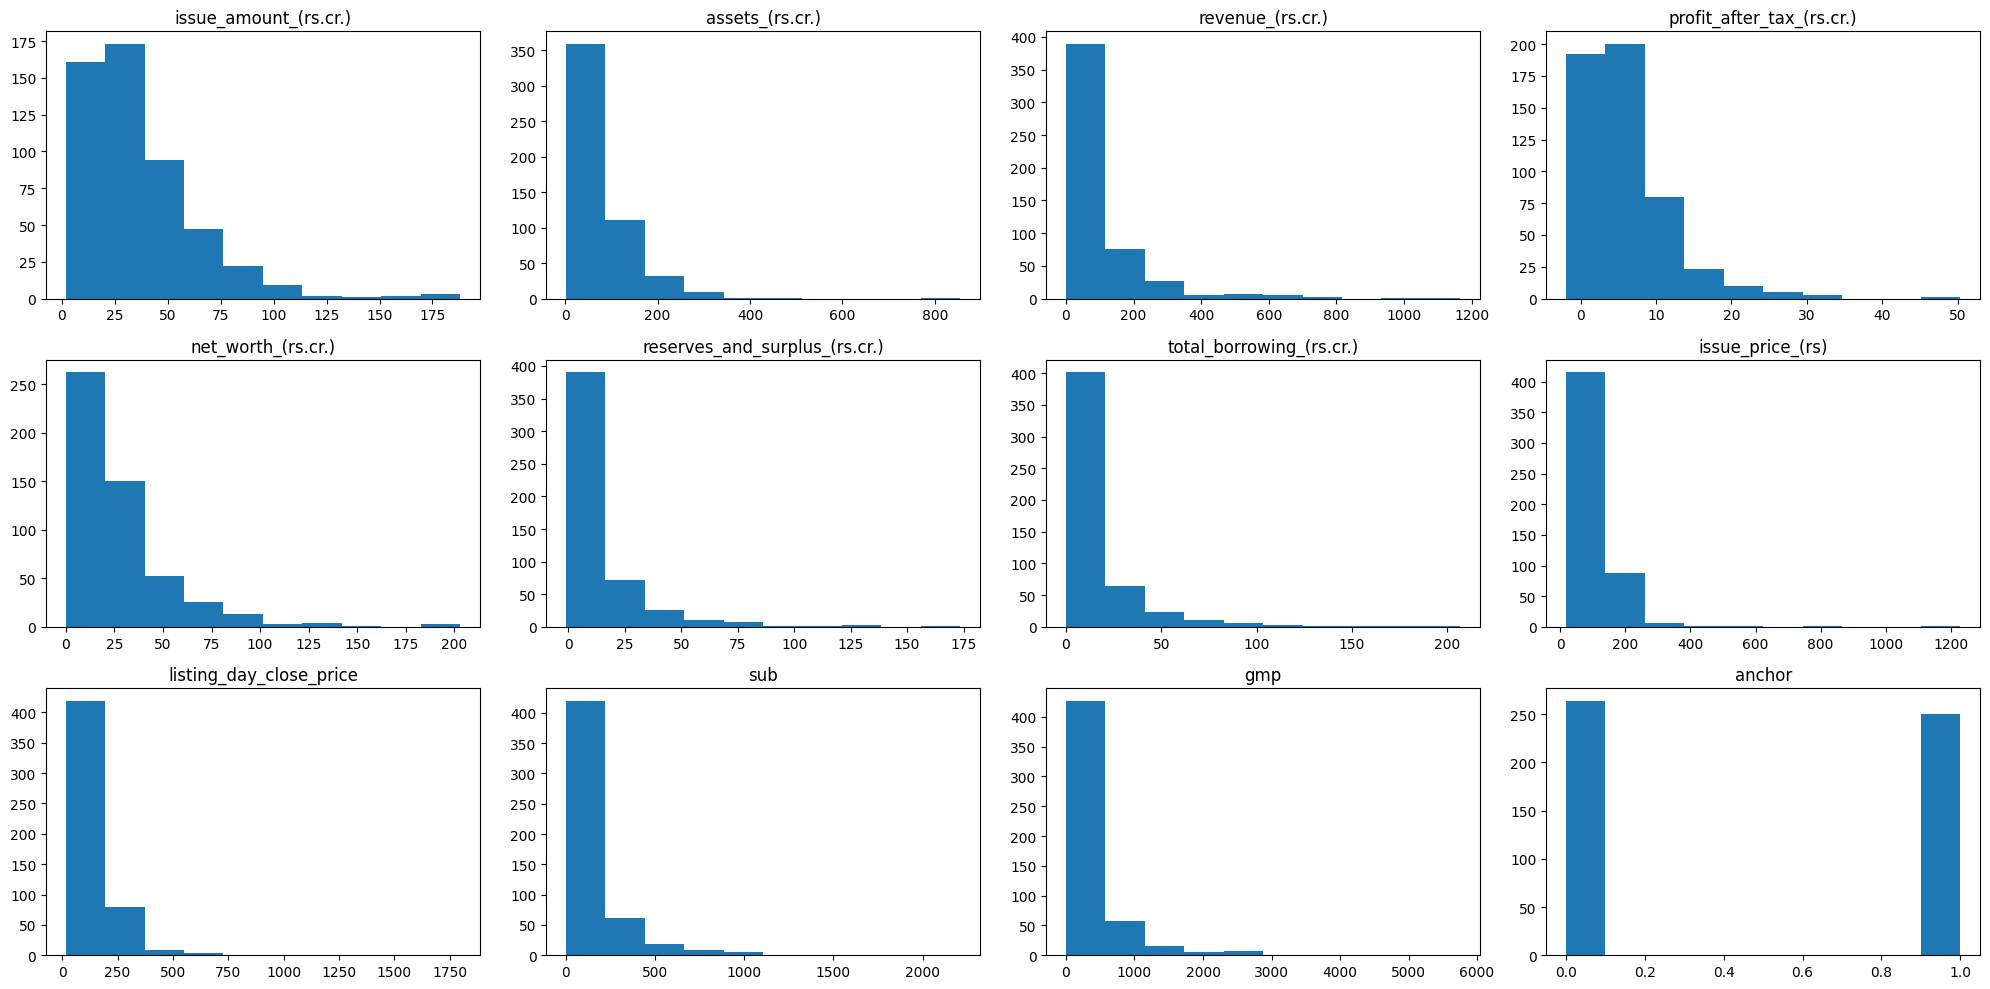

In [12]:
features = df.columns
n_features = len(features)

fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()   

for i, feature in enumerate(features):
    if i < len(axes):
        axes[i].hist(df[feature].dropna())
        axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

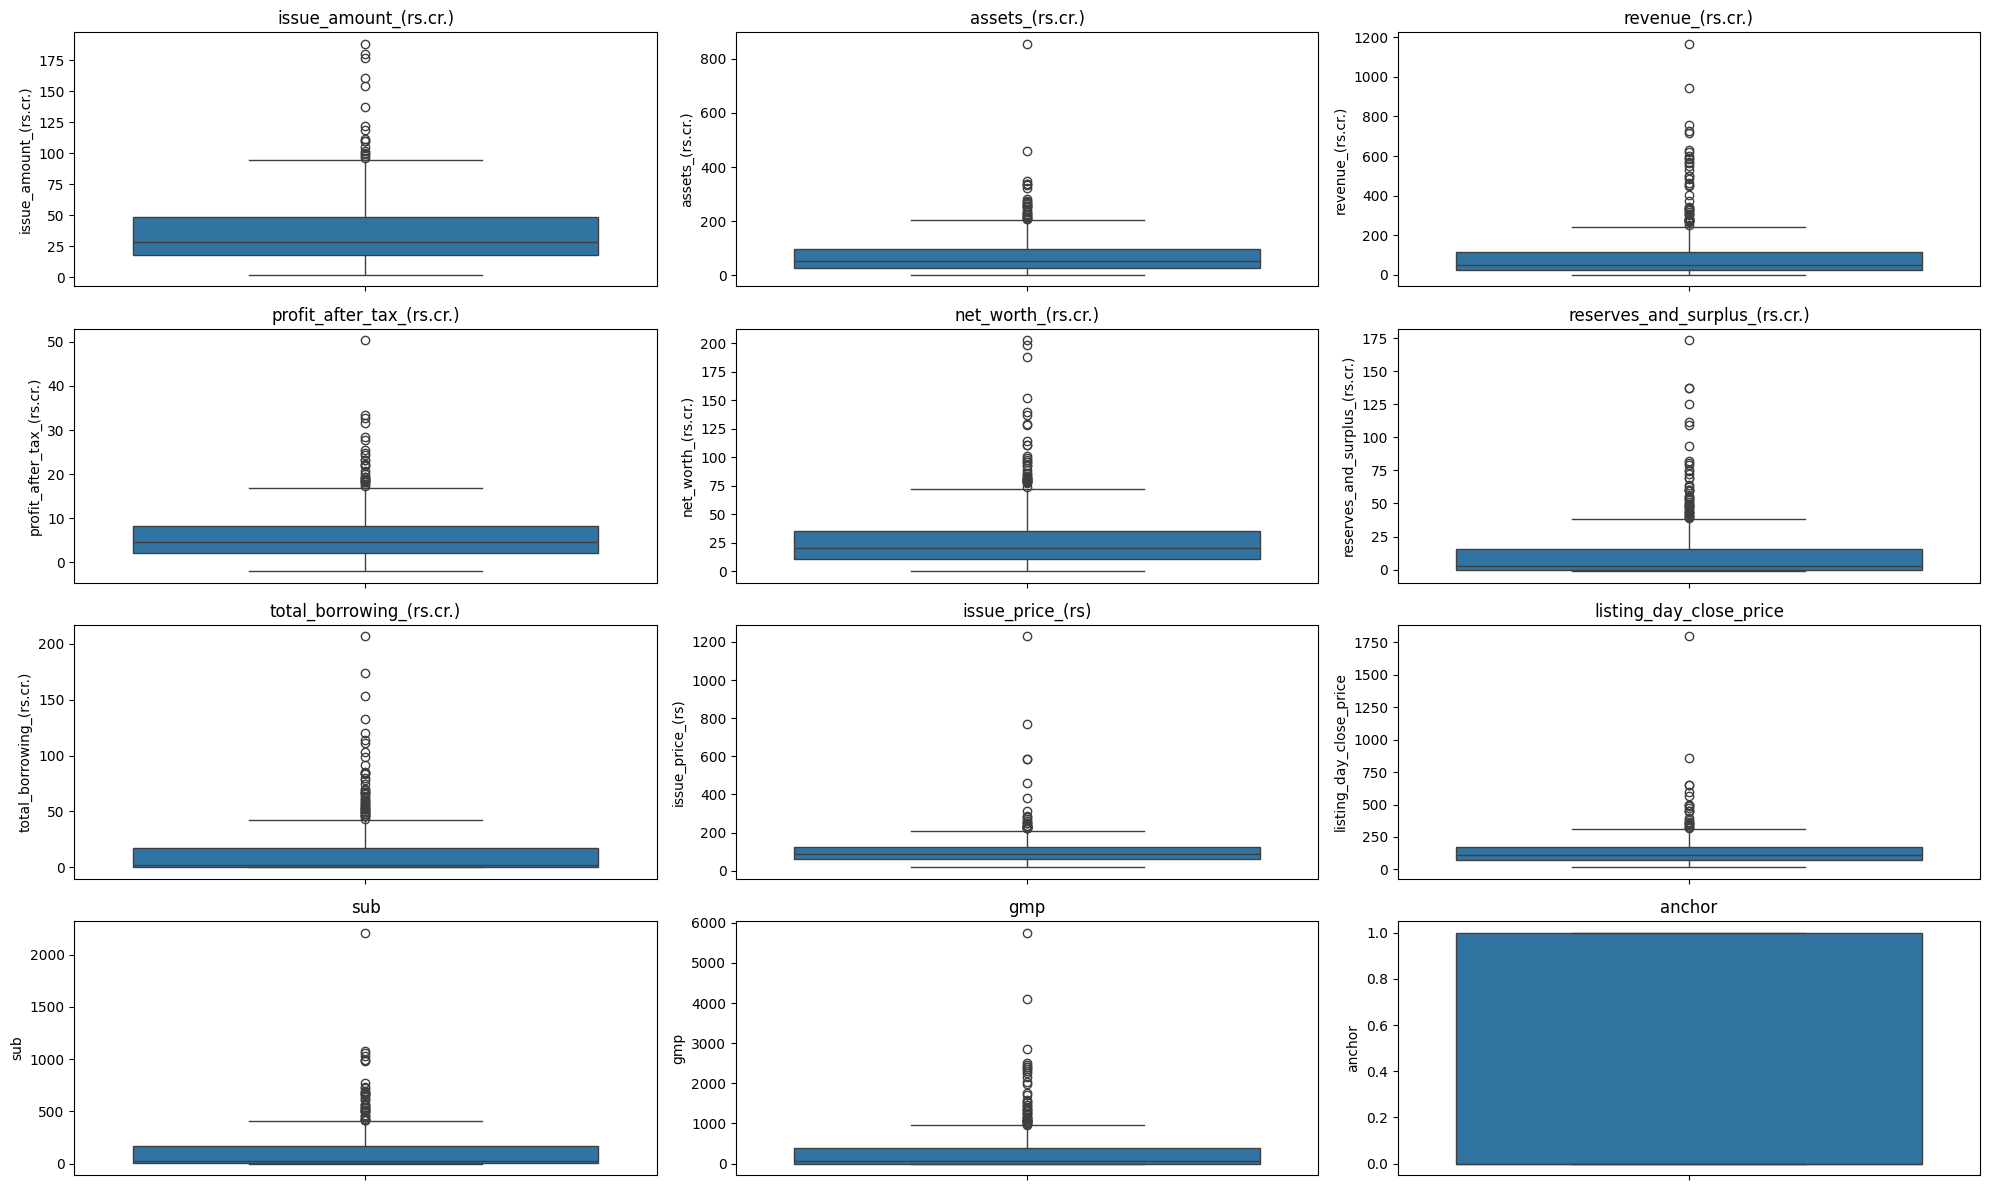

In [13]:
features = df.columns

fig, axes = plt.subplots(4, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    if i < len(axes):
        sns.boxplot(y=df[feature], ax=axes[i])
        axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [14]:
df["sub"].quantile(0.99)

np.float64(986.9136000000001)

In [15]:
pd.merge(company_name, df[df["sub"] > 1000],right_index=True, left_index=True)


,company_name,issue_amount_(rs.cr.),assets_(rs.cr.),revenue_(rs.cr.),profit_after_tax_(rs.cr.),net_worth_(rs.cr.),reserves_and_surplus_(rs.cr.),total_borrowing_(rs.cr.),issue_price_(rs),listing_day_close_price,sub,gmp,anchor
51,Austere Systems,14.78,18.63,18.86,4.01,16.27,8.62,0.48,55,79.32,1076.99,325.0,1.0
182,NACDAC Infrastructure,9.24,30.23,13.76,1.60,13.61,0.00,0.00,35,69.82,2209.76,505.0,1.0
183,Hamps Bio,5.91,6.44,4.36,0.34,3.71,0.00,0.00,51,101.74,1057.00,605.0,0.0
187,Toss The Coin,8.70,5.95,4.39,1.16,4.99,0.00,0.00,182,363.05,1025.76,2145.0,1.0


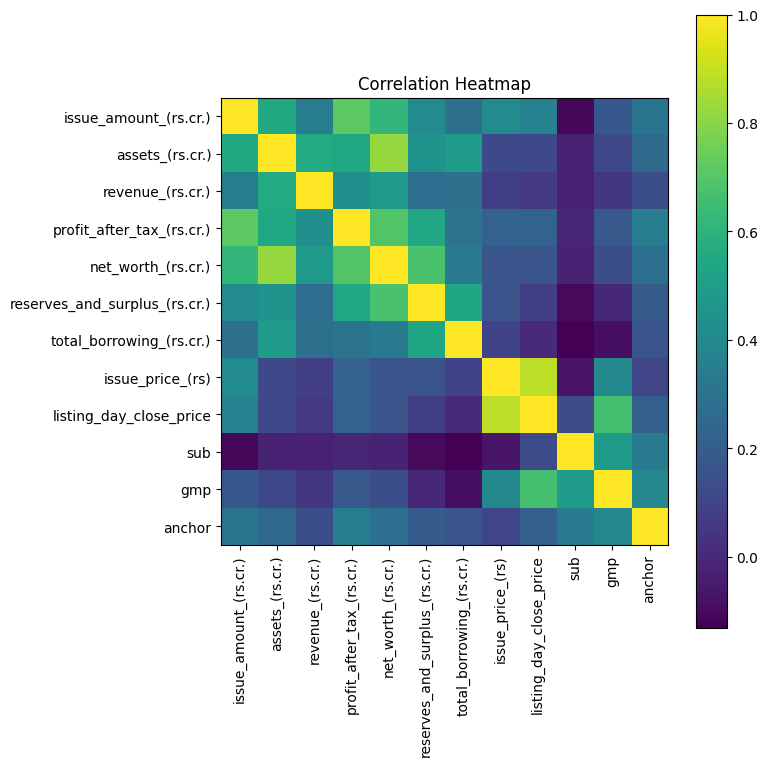

In [16]:
plt.figure(figsize=(8, 8))

corr = df.corr().values
features = df.corr().columns

plt.imshow(corr, interpolation='nearest')
plt.colorbar()

plt.xticks(np.arange(len(features)), features, rotation=90)
plt.yticks(np.arange(len(features)), features)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [17]:
listing_gains = (df["listing_day_close_price"] - df["issue_price_(rs)"])
print(f"Number of SME IPOs having positive listing gains based on closing price -> {int((listing_gains > 0).sum())}")

Number of SME IPOs having positive listing gains based on closing price -> 403


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

In [19]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [20]:
df_train.shape, df_val.shape, df_test.shape

((308, 12), (103, 12), (103, 12))

In [105]:
y_train = (df_train["listing_day_close_price"] - df_train["issue_price_(rs)"])
y_val = df_val["listing_day_close_price"] - df_val["issue_price_(rs)"]
y_test = df_test["listing_day_close_price"] - df_test["issue_price_(rs)"]

In [106]:
del df_train["listing_day_close_price"]
del df_val["listing_day_close_price"]
del df_test["listing_day_close_price"]


In [107]:
X_train = df_train
X_val = df_val
X_test = df_test

In [108]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = round(root_mean_squared_error(y_val, y_pred),3)
    r2 = round(r2_score(y_val, y_pred),3)
    print(f"""Model -> {model}
    rmse -> {rmse}
    r2 -> {r2}
    """)
    

In [109]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
rf = RandomForestRegressor()
xgb = XGBRegressor()
models = [lr, lasso, ridge, rf, xgb]

In [110]:
print("** Training Models ** \n")
for model in models:
    train_model(model)
    print("="*100)

** Training Models ** 

Model -> LinearRegression()
    rmse -> 38.655
    r2 -> 0.954
    
Model -> Lasso()
    rmse -> 38.668
    r2 -> 0.954
    
Model -> Ridge()
    rmse -> 38.655
    r2 -> 0.954
    
Model -> RandomForestRegressor()
    rmse -> 120.046
    r2 -> 0.558
    
Model -> XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_j

In [111]:
def cross_validate_model(model):
    
    scoring = {
        'r2': 'r2',
        'rmse': 'neg_root_mean_squared_error'
    }

    results = cross_validate(
        model,
        X_train,
        y_train,
        cv=5,
        scoring=scoring,
        return_train_score=False
    )

    print(f"""
Model -> {model}
Mean R²:   {results['test_r2'].mean():.4f}
Mean RMSE: {-results['test_rmse'].mean():.4f}
""")


In [112]:
print("** Cross Validatig models **\n")
for model in models:
    cross_validate_model(model)
    print("="*100)

** Cross Validatig models **


Model -> LinearRegression()
Mean R²:   0.8118
Mean RMSE: 41.7407


Model -> Lasso()
Mean R²:   0.8131
Mean RMSE: 41.6016


Model -> Ridge()
Mean R²:   0.8119
Mean RMSE: 41.7393


Model -> RandomForestRegressor()
Mean R²:   0.7163
Mean RMSE: 53.9069


Model -> XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [114]:
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [115]:
def tune_and_evaluate_rf(model, param_grid):

    scoring = {
        'r2': 'r2',
        'rmse': 'neg_root_mean_squared_error'
    }

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        scoring=scoring,
        refit='r2',        
        cv=5,
        verbose=1,
        n_iter=20,
        return_train_score=True,
        random_state=42
    )

    search.fit(X_train, y_train)

    # Best model
    best_model = search.best_estimator_

    # Cross-validation metrics
    best_idx = search.best_index_
    cv_r2 = search.cv_results_['mean_test_r2'][best_idx]
    cv_rmse = -search.cv_results_['mean_test_rmse'][best_idx]

    # Predictions on val set
    y_pred = best_model.predict(X_val)

    val_r2 = r2_score(y_val, y_pred)
    val_rmse = root_mean_squared_error(y_val, y_pred)

    print("\n===== Hyperparameter Tuning Results =====")
    print("Best Parameters:", search.best_params_)
    print(f"CV R²:   {cv_r2:.4f}")
    print(f"CV RMSE: {cv_rmse:.4f}")

    print("\n===== VAL Set Performance =====")
    print(f"Test R²:   {val_r2:.4f}")
    print(f"Test RMSE: {val_rmse:.4f}")
    print()

    return best_model


In [116]:
rf_best_model = tune_and_evaluate_rf(RandomForestRegressor(), rf_param_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

===== Hyperparameter Tuning Results =====
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
CV R²:   0.7314
CV RMSE: 52.2509

===== VAL Set Performance =====
Test R²:   0.5582
Test RMSE: 119.9884



In [117]:
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
}

In [118]:
def tune_and_evaluate_xgb(model, param_grid):
    scoring = {
        "r2": "r2",
        "rmse": "neg_root_mean_squared_error"
    }

    model = XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        tree_method="hist"  # faster
    )

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=27,
        scoring=scoring,
        refit="r2",
        cv=5,
        verbose=1,
        random_state=42,
        return_train_score=True
    )

    search.fit(X_train, y_train)

    # Best estimator & results
    best_model = search.best_estimator_
    best_idx = search.best_index_

    cv_r2 = search.cv_results_["mean_test_r2"][best_idx]
    cv_rmse = -search.cv_results_["mean_test_rmse"][best_idx]

    # Test set predictions
    y_pred = best_model.predict(X_val)
    val_r2 = r2_score(y_val, y_pred)
    val_rmse = root_mean_squared_error(y_test, y_pred)

    print("\n===== XGBOOST TUNING RESULTS =====")
    print("Best Parameters:", search.best_params_)
    print(f"CV R²:   {cv_r2:.4f}")
    print(f"CV RMSE: {cv_rmse:.4f}")

    print("\n===== VAL SET PERFORMANCE =====")
    print(f"val R²:   {val_r2:.4f}")
    print(f"val RMSE: {val_rmse:.4f}")

    return best_model


In [119]:
xgb_best_model = tune_and_evaluate_xgb(XGBRegressor(), xgb_param_grid)

Fitting 5 folds for each of 27 candidates, totalling 135 fits

===== XGBOOST TUNING RESULTS =====
Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05}
CV R²:   0.7148
CV RMSE: 54.0487

===== VAL SET PERFORMANCE =====
val R²:   0.5632
val RMSE: 135.0654


In [120]:
def score_model(model):
    y_pred = model.predict(X_val)
    rmse = round(root_mean_squared_error(y_val, y_pred),4)
    r2 = round(r2_score(y_val, y_pred),4)
    return rmse,r2

In [121]:
models = {"Linear_regression":lr, "Lasso":lasso, "Ridge":ridge, "RandomForest":rf_best_model, "XGBoost" : xgb_best_model}

In [122]:
scores_for_all_models = []
for model_name,model in models.items():
    rmse, r2 = score_model(model)
    scores_for_all_models.append({"model":model_name, "root_mean_squared_error":rmse, "r2_score":r2})

In [123]:
model_scores = pd.DataFrame(scores_for_all_models).sort_values(by="root_mean_squared_error")
model_scores

,model,root_mean_squared_error,r2_score
0,Linear_regression,38.6546,0.9542
2,Ridge,38.6553,0.9541
1,Lasso,38.6678,0.9541
4,XGBoost,119.3047,0.5632
3,RandomForest,119.9884,0.5582


In [124]:
min_rmse_model = model_scores.iloc[0]
best_model = models[min_rmse_model["model"]]
cross_validate_model(best_model)


Model -> LinearRegression()
Mean R²:   0.8118
Mean RMSE: 41.7407



In [125]:
feature_imp = pd.DataFrame({"features" : best_model.feature_names_in_, "coefficients" : best_model.coef_})

In [126]:
feature_imp

,features,coefficients
0,issue_amount_(rs.cr.),0.071810
1,assets_(rs.cr.),-0.035436
2,revenue_(rs.cr.),-0.027366
3,profit_after_tax_(rs.cr.),0.781483
4,net_worth_(rs.cr.),0.140673
5,reserves_and_surplus_(rs.cr.),-0.381997
6,total_borrowing_(rs.cr.),-0.052331
7,issue_price_(rs),1.113246
8,sub,0.013428
9,gmp,0.070817


In [127]:
def test_model(model):
    y_pred = model.predict(df_test)
    r2 = r2_score(y_test,y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    print(f"""Model -> {model}
    rmse -> {rmse}
    r2 -> {r2}
    """)

In [132]:
test_model(best_model)

Model -> LinearRegression()
    rmse -> 31.896739050681774
    r2 -> 0.8955521554227993
    


In [131]:
import pickle

In [56]:
with open("model.bin", "wb") as f_out:
    pickle.dump(best_model, f_out)

In [139]:
X_test.head(1)

,issue_amount_(rs.cr.),assets_(rs.cr.),revenue_(rs.cr.),profit_after_tax_(rs.cr.),net_worth_(rs.cr.),reserves_and_surplus_(rs.cr.),total_borrowing_(rs.cr.),issue_price_(rs),sub,gmp,anchor
304,22.18,35.65,52.02,6.77,15.27,0.0,0.0,75,682.14,1995.0,1.0


In [6]:
df[df["listing_day_close_price"] < df["issue_price_(rs)"]].to_dict(orient="records")

[{'company_name': 'Jayesh Logistics',
  'issue_amount_(rs.cr.)': 27.17,
  'assets_(rs.cr.)': 65.22,
  'revenue_(rs.cr.)': 25.25,
  'profit_after_tax_(rs.cr.)': 2.02,
  'net_worth_(rs.cr.)': 19.35,
  'reserves_and_surplus_(rs.cr.)': 13.01,
  'total_borrowing_(rs.cr.)': 29.65,
  'issue_price_(rs)': 122,
  'listing_day_close_price': 117.8,
  'sub': 65.59,
  'gmp': 92.0,
  'anchor': 1.0},
 {'company_name': 'Mittal Sections',
  'issue_amount_(rs.cr.)': 50.26,
  'assets_(rs.cr.)': 50.48,
  'revenue_(rs.cr.)': 28.17,
  'profit_after_tax_(rs.cr.)': 1.47,
  'net_worth_(rs.cr.)': 11.81,
  'reserves_and_surplus_(rs.cr.)': 3.94,
  'total_borrowing_(rs.cr.)': 20.7,
  'issue_price_(rs)': 143,
  'listing_day_close_price': 108.7,
  'sub': 2.25,
  'gmp': 1.0,
  'anchor': 0.0},
 {'company_name': 'Greenleaf Envirotech',
  'issue_amount_(rs.cr.)': 20.75,
  'assets_(rs.cr.)': 25.38,
  'revenue_(rs.cr.)': 39.08,
  'profit_after_tax_(rs.cr.)': 4.7,
  'net_worth_(rs.cr.)': 12.41,
  'reserves_and_surplus_(rs.c